In [13]:

from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 시각화
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.
# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=3)


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [10]:
## 정성적 그래프 분석
def plot_rolling_statistics(timeseries, window=12):

    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열
    # window 개씩 이동 평균을 냄.
#     print(timeseries)
#     print(rolmean)
#     print(rolstd)
    
     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    #plt.ylim(7,10)
    plt.show(block=False)
    
#함수정의
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)



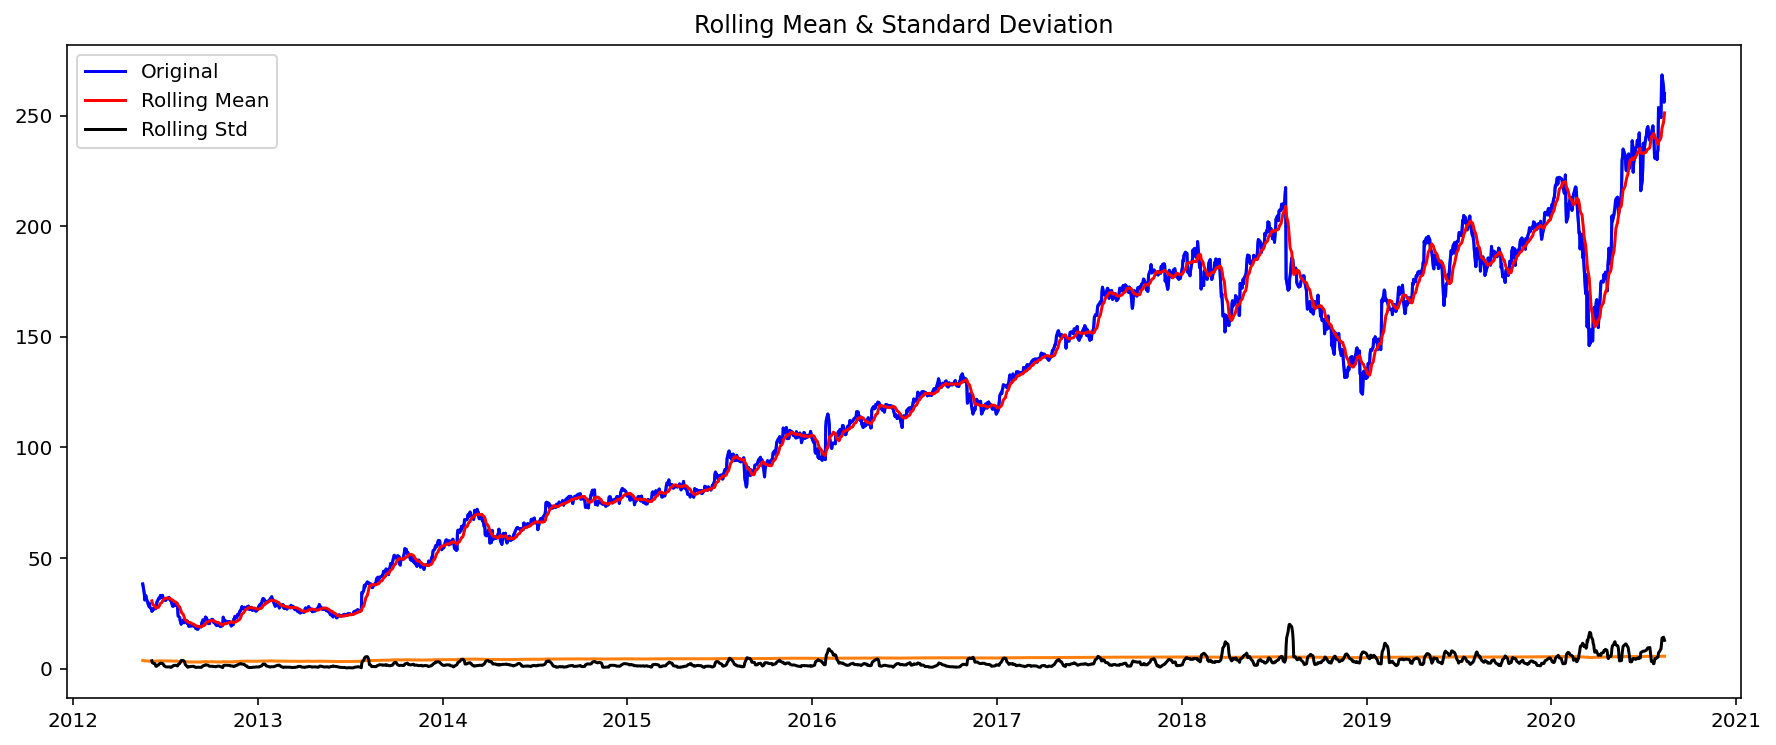

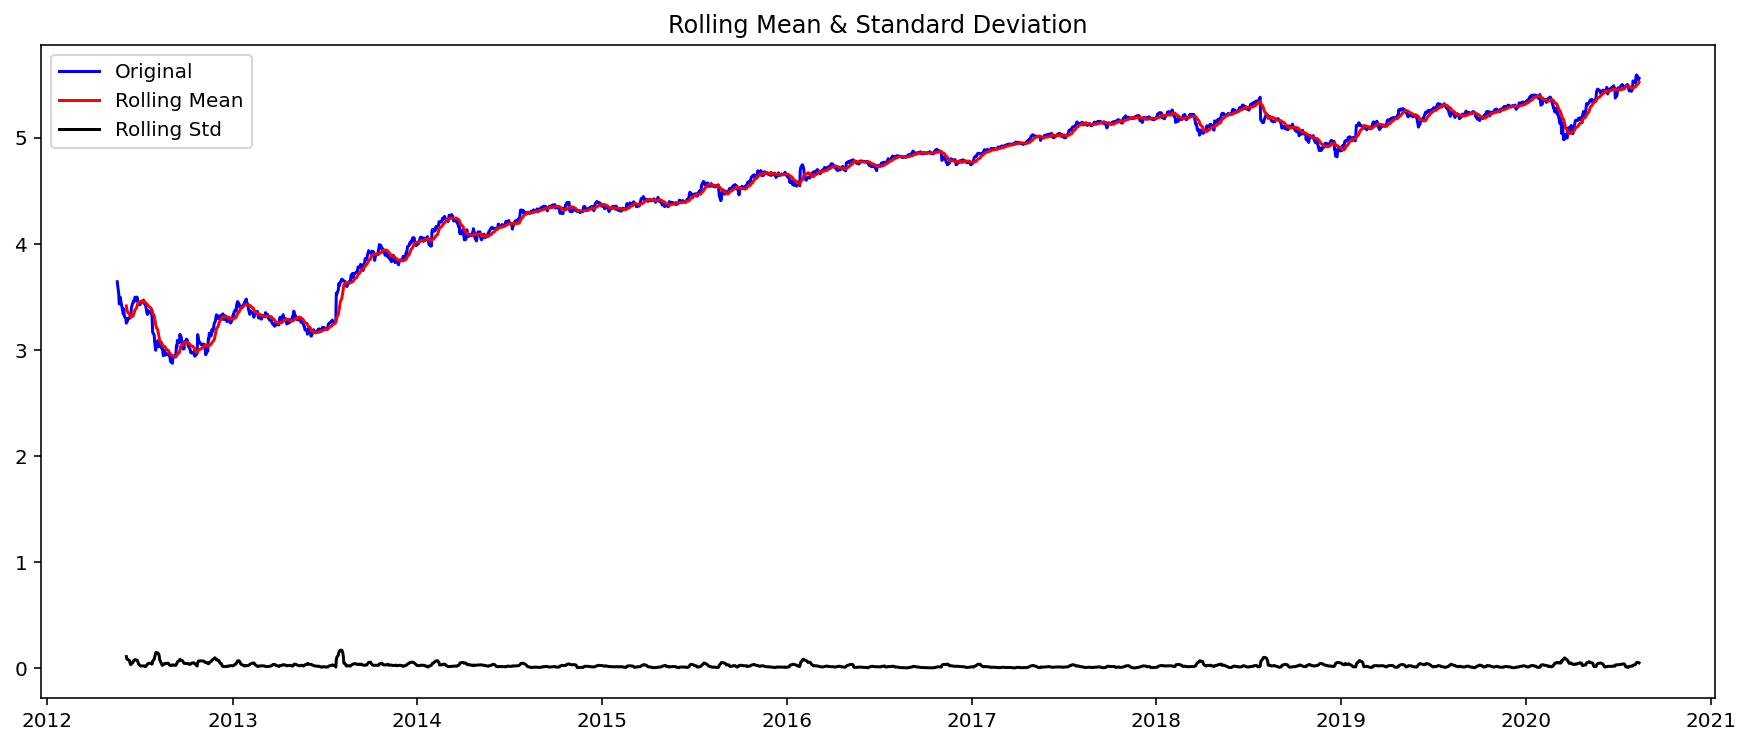

Results of Dickey-Fuller Test:
Test Statistic                   -1.182537
p-value                           0.681062
#Lags Used                       10.000000
Number of Observations Used    2061.000000
Critical Value (1%)              -3.433527
Critical Value (5%)              -2.862943
Critical Value (10%)             -2.567517
dtype: float64


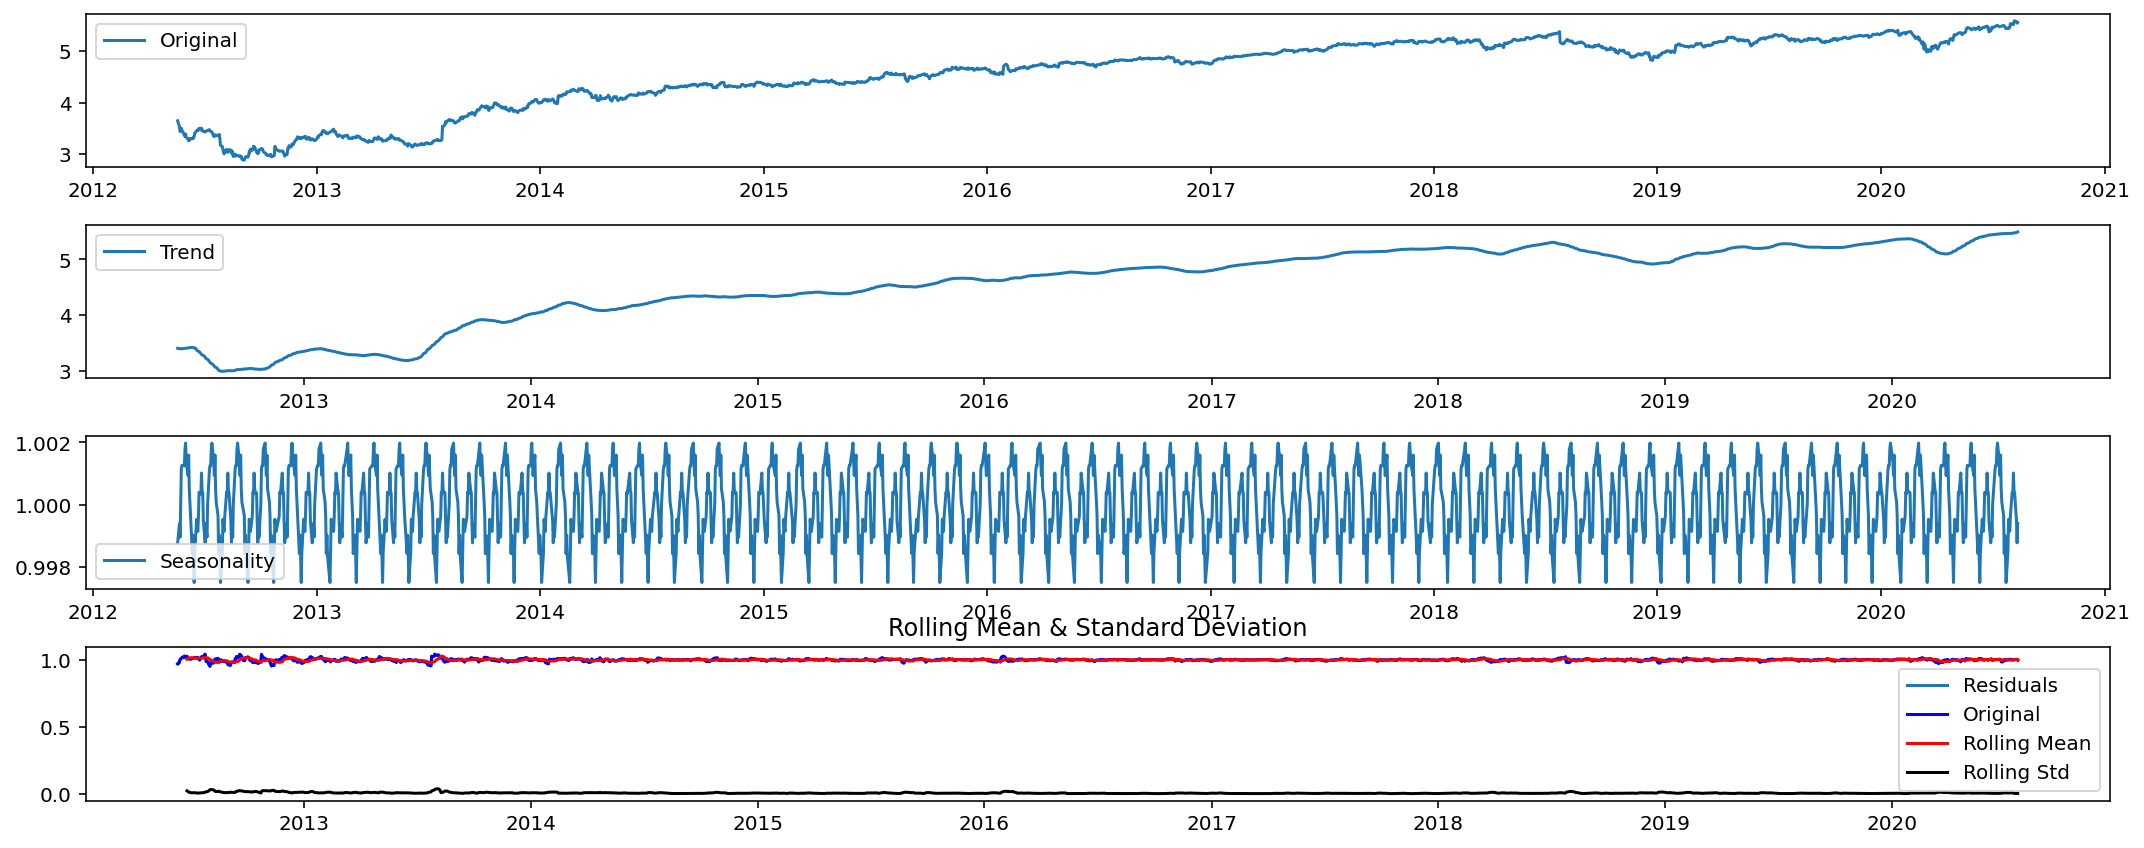

Results of Dickey-Fuller Test:
Test Statistic                -1.183524e+01
p-value                        7.818997e-22
#Lags Used                     2.600000e+01
Number of Observations Used    2.015000e+03
Critical Value (1%)           -3.433599e+00
Critical Value (5%)           -2.862975e+00
Critical Value (10%)          -2.567534e+00
dtype: float64
Date
2012-05-18    3.643621
2012-05-21    3.527242
Name: Close, dtype: float64
(1864,)
(208,)


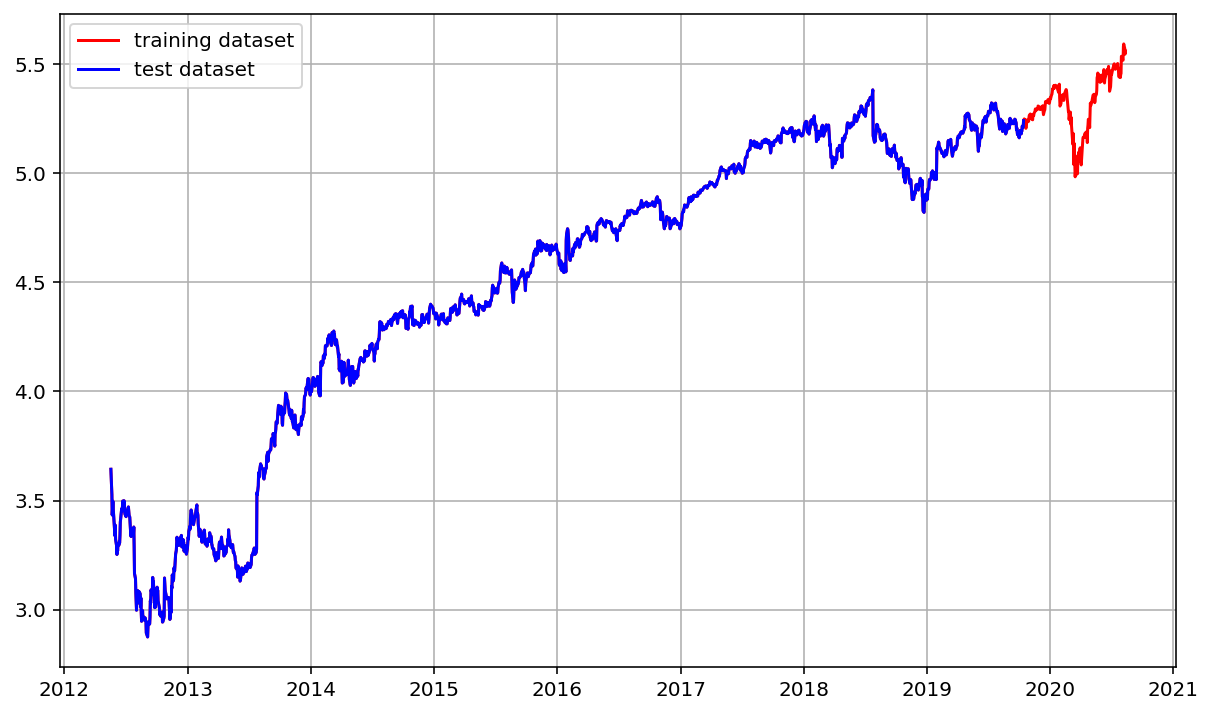

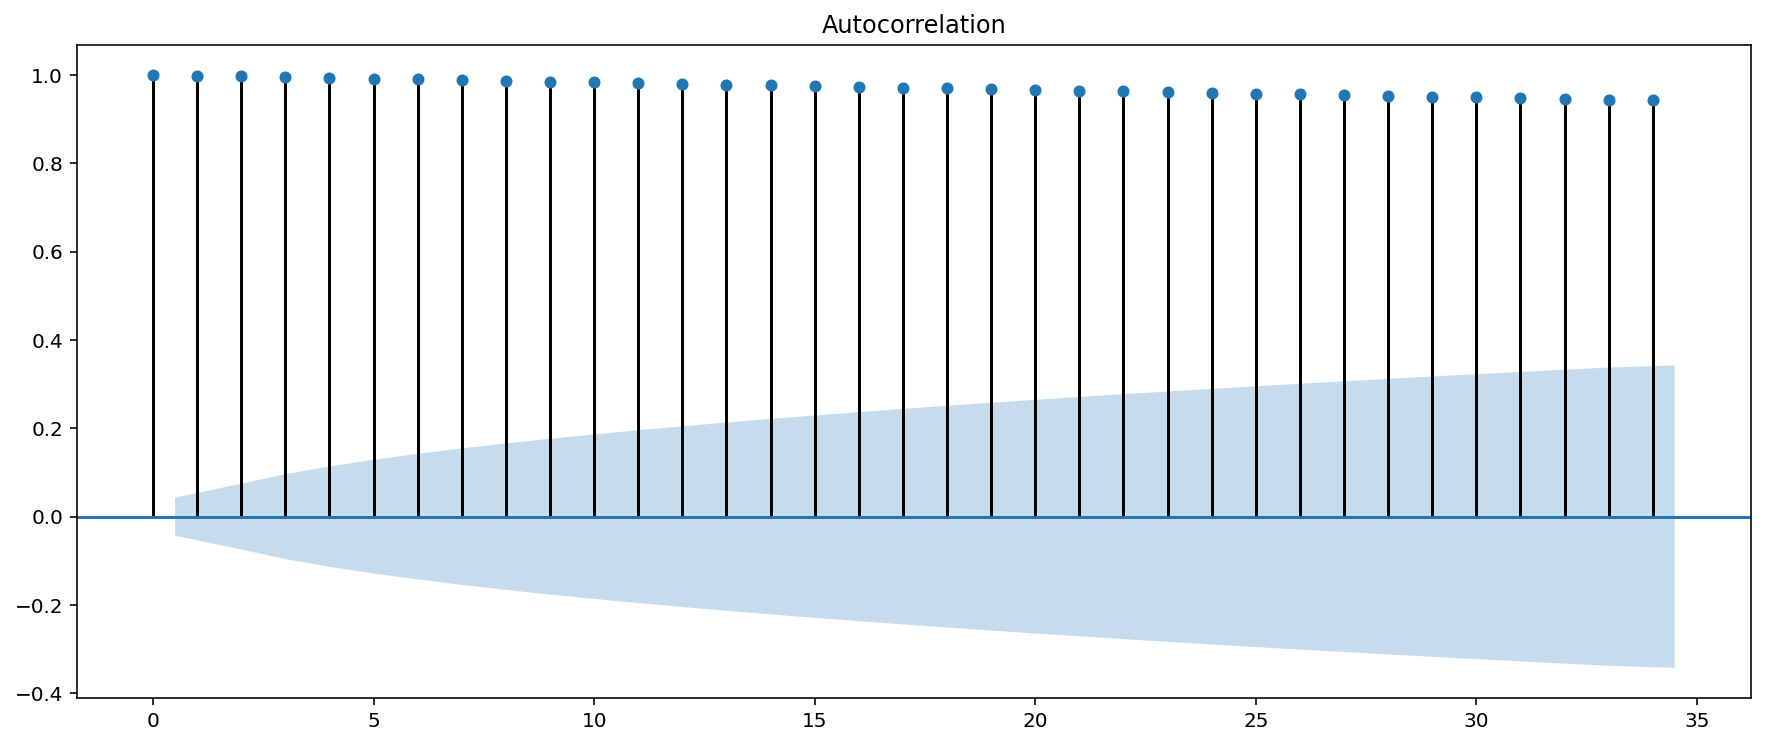

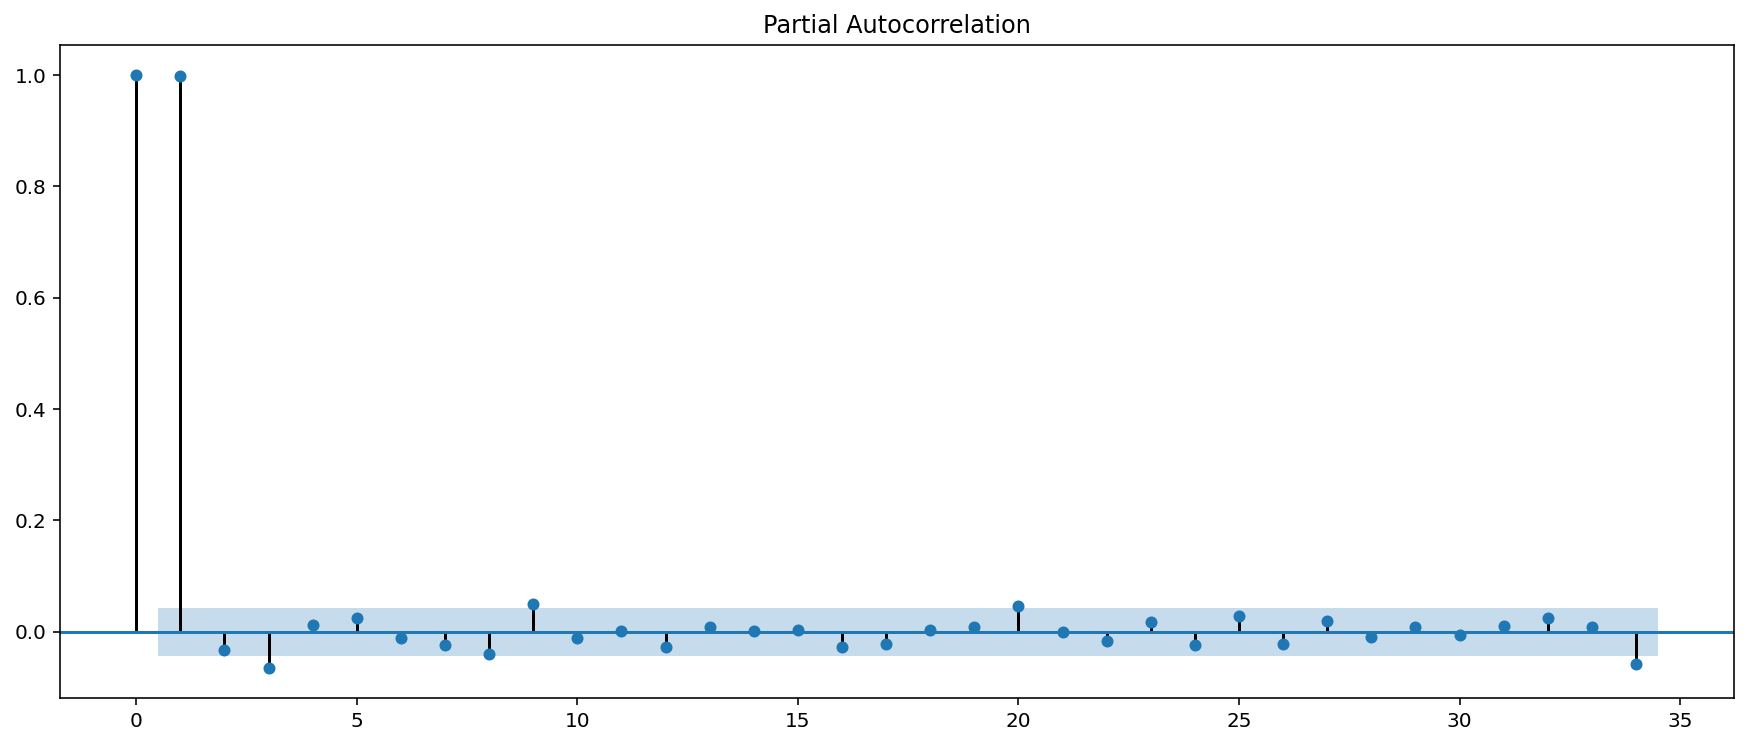

Results of Dickey-Fuller Test:
Test Statistic                -1.440184e+01
p-value                        8.483075e-27
#Lags Used                     1.000000e+01
Number of Observations Used    2.060000e+03
Critical Value (1%)           -3.433528e+00
Critical Value (5%)           -2.862944e+00
Critical Value (10%)          -2.567517e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1863
Model:                 ARIMA(0, 1, 4)   Log Likelihood                4402.848
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 13 Aug 2020   AIC                          -8793.697
Time:                        17:40:02   BIC                          -8760.517
Sample:                             1   HQIC                         -8781.470
                                                                              
              

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


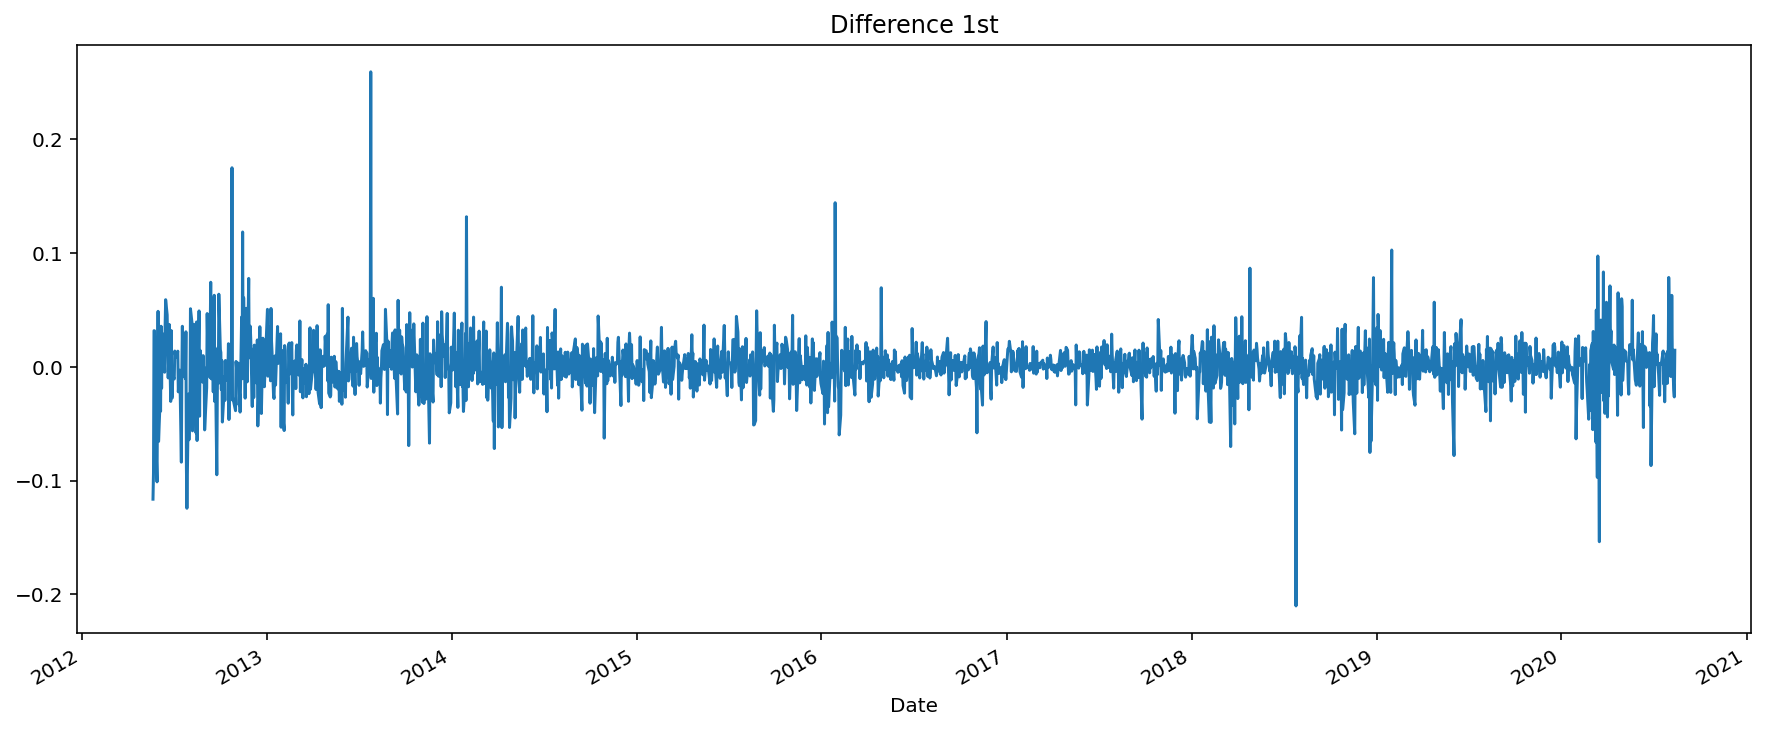

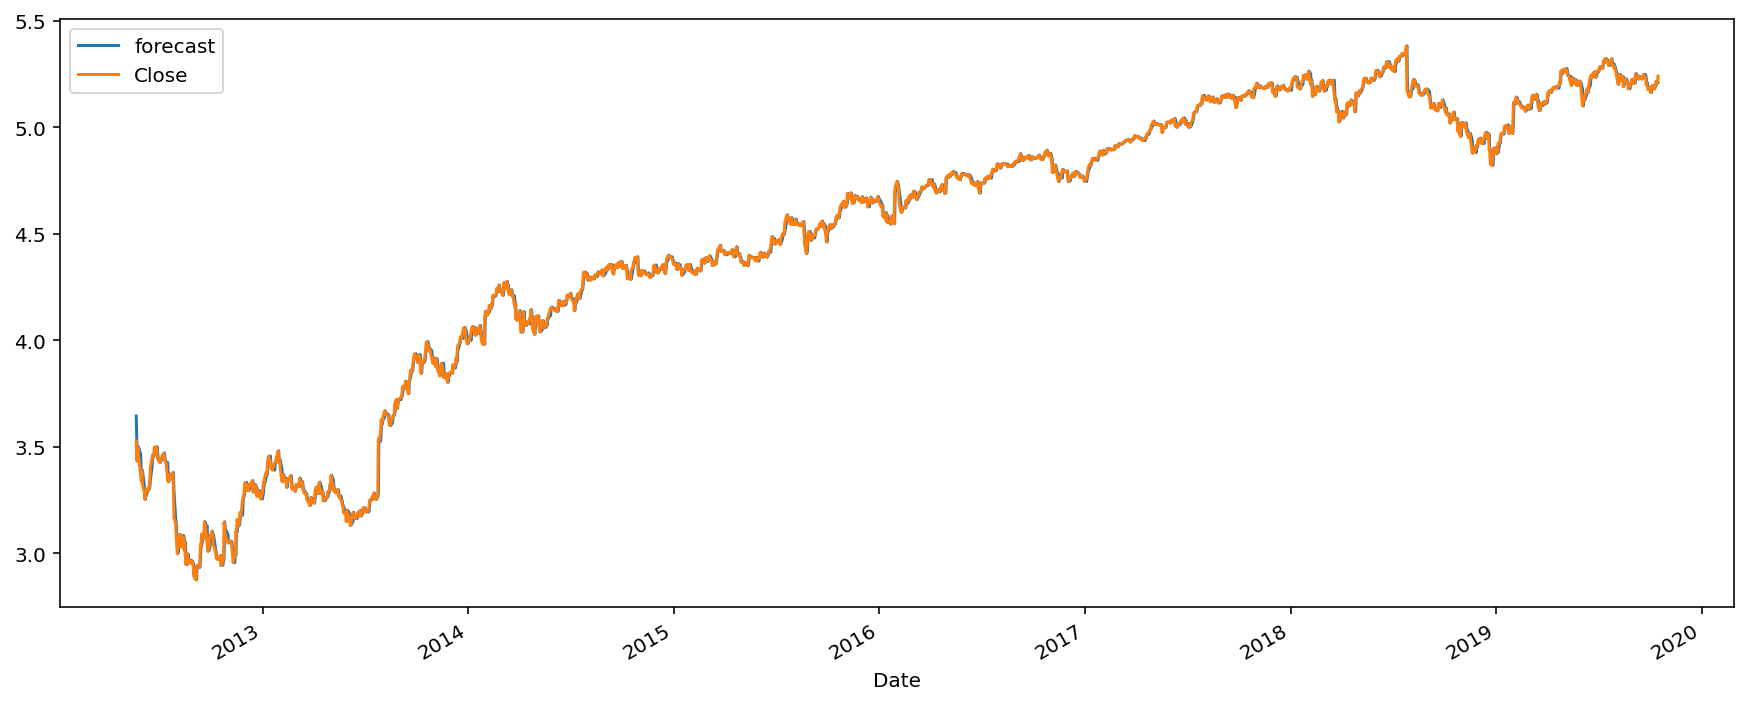

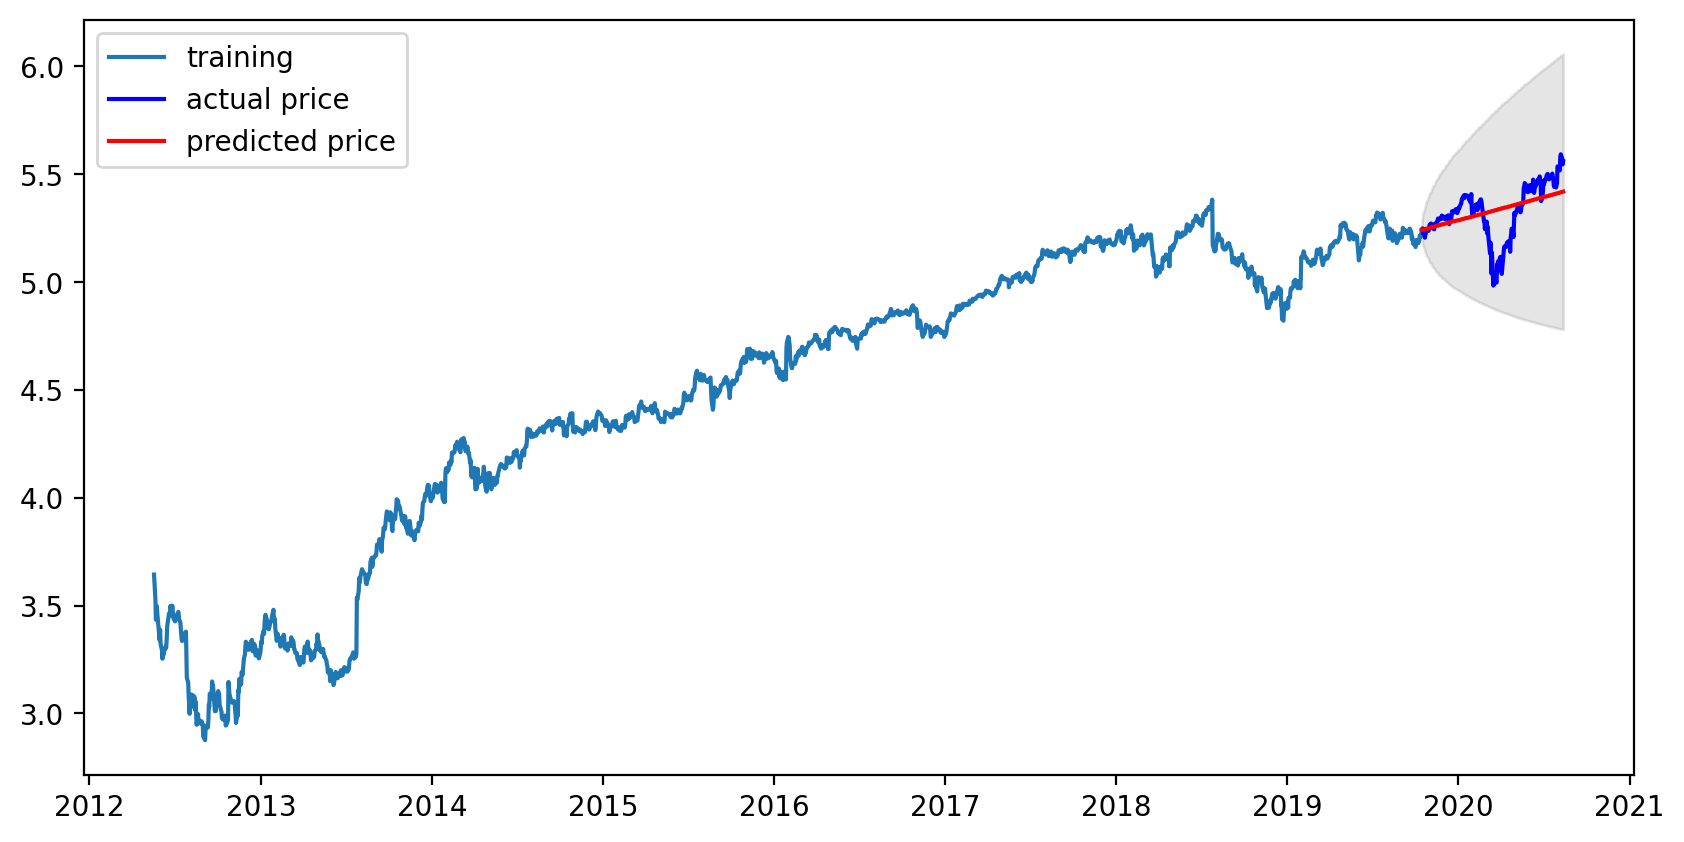

MSE:  487.11039486483514
MAE:  16.71725420392465
RMSE:  22.070577583399015
MAPE: 8.65%


In [12]:
#data import
file_path_fb = './data/facebook.csv'
#file_path_fb = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/E06-Stationary_Time_Series/data/asiana_airlines.csv' 

facebook = pd.read_csv(file_path_fb, index_col="Date", parse_dates=True)
facebook.head()

#series object exprot
fb_s = facebook['Close']
fb_s.head()

#전처리
fb_s = fb_s.interpolate(method="time")
fb_s[fb_s.isna()]
plt.plot(fb_s)

# 로그 함수 씌우기
fb_s_log = np.log(fb_s)
plt.plot(fb_s_log)

#
#로그 전.
plot_rolling_statistics(fb_s, window=12)
# 로그 후.
plot_rolling_statistics(fb_s_log, window=12)

augmented_dickey_fuller_test(fb_s_log)

# 시계열 분석

decomposition = seasonal_decompose(fb_s_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(fb_s_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# 안정성 확인
# Residual 로 확인
plot_rolling_statistics(residual) # 그래프
residual.dropna(inplace=True) # nan 제거
augmented_dickey_fuller_test(residual) # 귀무가설 확인

# train, test data spilt
train_fb_data, test_fb_data = fb_s_log[:int(len(fb_s_log)*0.9)], fb_s_log[int(len(fb_s_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(fb_s_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(train_fb_data, c='b', label='test dataset')
plt.legend()

# data set check
print(fb_s_log[:2])
print(train_fb_data.shape)
print(test_fb_data.shape)


plot_acf(fb_s_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(fb_s_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 1차 차분 구하기
diff_1 = fb_s_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)


#훈련


# Build and Train  Model
model = ARIMA(train_fb_data, order=(0, 1, 4))
fit_model = model.fit(disp=-1)
print(fit_model.summary())

fit_model.plot_predict()

# 데이터 구간
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fit_model.forecast(len(test_fb_data), alpha=0.05)  # 95% conf
#   step , 
# alpha 


# Make as pandas series
fc_series = pd.Series(fc, index=test_fb_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_fb_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_fb_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_fb_data, label='training')
plt.plot(test_fb_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

mse = mean_squared_error(np.exp(test_fb_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_fb_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_fb_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_fb_data))/np.abs(np.exp(test_fb_data)))
print('MAPE: {:.2f}%'.format(mape*100))